In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats import linregress

csv = pd.read_csv('joint_data_12_to_16_noformatting.csv')

joint_df = pd.DataFrame(csv)
joint_df = joint_df.sort_values(['State','Year'])
joint_df = joint_df.reset_index(drop=True)
# joint_df.dtypes

In [2]:
joint_df['Commute Times Combined (auto/public/walking)'] = joint_df['Transit: Solo Auto']+joint_df['Transit: Public Transit']+joint_df['Transit: Walking']
joint_df['Avg Commute: Solo Auto'] = joint_df['Transit: Solo Auto']/joint_df['Population']
joint_df['Avg Commute: Public Transit'] = joint_df['Transit: Public Transit']/joint_df['Population']
joint_df['Avg Commute: Walking'] = joint_df['Transit: Walking']/joint_df['Population']

In [3]:
float_int_only = joint_df
float_int_only = float_int_only.drop(columns=['Year','State'])

ballots = float_int_only['VEP Total Ballots Counted']
columns = []
r_values = []

for f in float_int_only:
    x_values = float_int_only[f]
    y_values = ballots
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    r_values.append(rvalue)
    columns.append(f)

    
r_value_df = pd.DataFrame({'Column Name':columns,
                          'R-Values':r_values})
r_value_df['R-Squared'] = r_value_df['R-Values']**2
r_value_df = r_value_df.sort_values('R-Squared', ascending=False)
r_value_df

C:\Users\brock\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\brock\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\brock\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,Column Name,R-Values,R-Squared
32,VEP Total Ballots Counted,1.000000,1.000000
33,VEP Highest Office,0.999137,0.998275
34,VAP Highest Office,0.986062,0.972318
23,Poverty Rate,-0.256703,0.065896
24,Pop Rate: White Only,0.203089,0.041245
10,Pop: Native Hawaiian Only,-0.163705,0.026799
40,Avg Commute: Solo Auto,0.160913,0.025893
27,Pop Rate: Native Hawaiian Only,-0.158308,0.025061
26,Pop Rate: American Indian Only,-0.152861,0.023366
36,Highest Office,0.150458,0.022638


In [4]:
commute_df = float_int_only.dropna()

ballots = commute_df['VEP Total Ballots Counted']
columns = []
r_values = []

for f in commute_df:
    x_values = commute_df[f]
    y_values = ballots
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    r_values.append(rvalue)
    columns.append(f)

    
commute_r_value_df = pd.DataFrame({'Column Name':columns,
                          'R-Values':r_values})
commute_r_value_df['R-Squared'] = commute_r_value_df['R-Values']**2
commute_r_value_df = commute_r_value_df.sort_values('R-Squared', ascending=False)
commute_r_value_df

,Column Name,R-Values,R-Squared
32,VEP Total Ballots Counted,1.000000,1.000000
33,VEP Highest Office,0.999088,0.998177
34,VAP Highest Office,0.986627,0.973434
23,Poverty Rate,-0.253331,0.064176
36,Highest Office,0.163025,0.026577
0,Median Income,0.161971,0.026235
35,Total Ballots Counted (Estimate),0.160002,0.025601
40,Avg Commute: Solo Auto,0.153239,0.023482
24,Pop Rate: White Only,0.141842,0.020119
22,Unemployment Rate,-0.136411,0.018608


In [5]:
mail_in_states = joint_df.loc[(joint_df['State'] == 'Oregon') |
                             (joint_df['State'] == 'Washington') |
                             (joint_df['State'] == 'Hawaii') |
                             (joint_df['State'] == 'Utah') |
                             (joint_df['State'] == 'Colorado')]
in_person_states = joint_df.loc[(joint_df['State'] != 'Oregon') &
                             (joint_df['State'] != 'Washington') &
                             (joint_df['State'] != 'Hawaii') &
                             (joint_df['State'] != 'Utah') &
                             (joint_df['State'] != 'Colorado')]

mail_in_float_int_only = mail_in_states
mail_in_float_int_only = mail_in_float_int_only.drop(columns=['Year','State'])

in_person_float_int_only = in_person_states
in_person_float_int_only = in_person_float_int_only.drop(columns=['Year','State'])

mail_in_ballots = mail_in_states['VEP Total Ballots Counted']
mail_in_columns = []
mail_in_r_values = []


for m in mail_in_float_int_only:
    x_values = mail_in_float_int_only[m]
    y_values = mail_in_ballots
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    mail_in_r_values.append(rvalue)
    mail_in_columns.append(m)

in_person_ballots = in_person_states['VEP Total Ballots Counted']
in_person_columns = []
in_person_r_values = []    

for i in in_person_float_int_only:
    x_values = in_person_float_int_only[i]
    y_values = in_person_ballots
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    in_person_r_values.append(rvalue)
    in_person_columns.append(i)

vote_type_r_value_df = pd.DataFrame({'Column Name':in_person_columns,
                          # NOTE: 'mail_in_r_values' is an analysis of 15 rows of data
                          'Mail-In R-Values':mail_in_r_values,
                          # NOTE: 'in_person_r_values' is an analysis of 119 rows of data
                          'In-Person R-Values':in_person_r_values})
vote_type_r_value_df['Mail-In R-Squared'] = vote_type_r_value_df['Mail-In R-Values']**2
vote_type_r_value_df['In-Person R-Squared'] = vote_type_r_value_df['In-Person R-Values']**2
vote_type_r_value_df = vote_type_r_value_df.sort_values('In-Person R-Squared', ascending=False)

C:\Users\brock\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\brock\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\brock\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [24]:
total_r_value_df = pd.merge(r_value_df,vote_type_r_value_df,on='Column Name')
total_r_value_df = total_r_value_df[['Column Name','R-Values','R-Squared','Mail-In R-Values','Mail-In R-Squared','In-Person R-Values','In-Person R-Squared']]
total_r_value_df

,Column Name,R-Values,R-Squared,Mail-In R-Values,Mail-In R-Squared,In-Person R-Values,In-Person R-Squared
0,VEP Total Ballots Counted,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,VEP Highest Office,0.999137,0.998275,0.998896,0.997792,0.999241,0.998482
2,VAP Highest Office,0.986062,0.972318,0.998045,0.996095,0.985140,0.970500
3,Poverty Rate,-0.256703,0.065896,0.291582,0.085020,-0.306986,0.094240
4,Pop Rate: White Only,0.203089,0.041245,0.515668,0.265914,0.137922,0.019023
5,Pop: Native Hawaiian Only,-0.163705,0.026799,-0.582010,0.338736,-0.095430,0.009107
6,Avg Commute: Solo Auto,0.160913,0.025893,0.329438,0.108529,0.160210,0.025667
7,Pop Rate: Native Hawaiian Only,-0.158308,0.025061,-0.570865,0.325887,-0.017881,0.000320
8,Pop Rate: American Indian Only,-0.152861,0.023366,-0.525428,0.276075,-0.050754,0.002576
9,Highest Office,0.150458,0.022638,0.791623,0.626666,0.125024,0.015631


The r-squared is: 0.06589632119337636


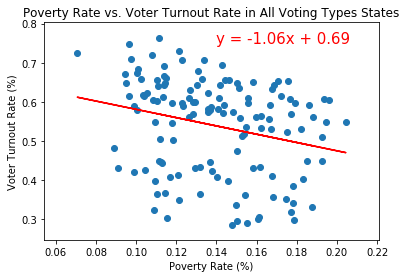

In [17]:
x_values = joint_df['Poverty Rate']
y_values = joint_df['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.14,.75),fontsize=15,color="red")
plt.title('Poverty Rate vs. Voter Turnout Rate in All Voting Types States')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Voter Turnout Rate (%)')
plt.show()

The r-squared is: 0.09424011250700502


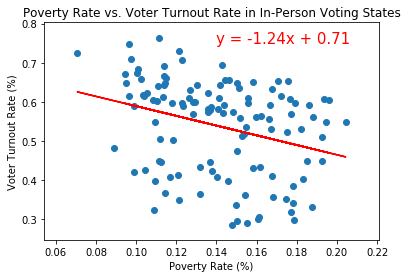

In [21]:
x_values = in_person_float_int_only['Poverty Rate']
y_values = in_person_float_int_only['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.14,.75),fontsize=15,color="red")
plt.title('Poverty Rate vs. Voter Turnout Rate in In-Person Voting States')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Voter Turnout Rate (%)')
plt.show()

The r-squared is: 0.08502035069521645


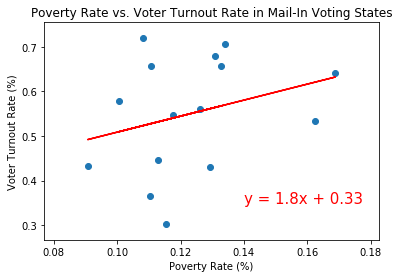

In [22]:
x_values = mail_in_float_int_only['Poverty Rate']
y_values = mail_in_float_int_only['VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.14,.35),fontsize=15,color="red")
plt.title('Poverty Rate vs. Voter Turnout Rate in Mail-In Voting States')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Voter Turnout Rate (%)')
plt.show()

In [ ]:
####################################################################################

In [ ]:
solo_auto_rate = []
public_transit_rate = []
walking_rate = []

for index, row in joint_df.iterrows():
    solo_rate = row[20]/row[8]
    public_rate = row[21]/row[8]
    walk_rate = row[22]/row[8]
    solo_auto_rate.append(solo_rate)
    public_transit_rate.append(public_rate)
    walking_rate.append(walk_rate)
    
joint_df['Transit Rate: Solo Auto'] = solo_auto_rate
joint_df['Transit Rate: Public Transit'] = public_transit_rate
joint_df['Transit Rate: Walking'] = walking_rate
joint_df

In [ ]:
transit_turnout_2012 = joint_df.loc[joint_df['Year'] == 2012, ['State','VEP Total Ballots Counted','Transit Rate: Solo Auto','Transit Rate: Public Transit','Transit Rate: Walking']]
transit_turnout_2012 = transit_turnout_2012.rename(columns={'VEP Total Ballots Counted':'2012 VEP Total Ballots Counted','Transit Rate: Solo Auto':'2012 Transit Rate: Solo Auto','Transit Rate: Public Transit':'2012 Transit Rate: Public Transit','Transit Rate: Walking':'2012 Transit Rate: Walking'})
transit_turnout_2014 = joint_df.loc[joint_df['Year'] == 2014, ['State','VEP Total Ballots Counted','Transit Rate: Solo Auto','Transit Rate: Public Transit','Transit Rate: Walking']]
transit_turnout_2014 = transit_turnout_2014.rename(columns={'VEP Total Ballots Counted':'2014 VEP Total Ballots Counted','Transit Rate: Solo Auto':'2014 Transit Rate: Solo Auto','Transit Rate: Public Transit':'2014 Transit Rate: Public Transit','Transit Rate: Walking':'2014 Transit Rate: Walking'})
transit_turnout_2016 = joint_df.loc[joint_df['Year'] == 2016, ['State','VEP Total Ballots Counted','Transit Rate: Solo Auto','Transit Rate: Public Transit','Transit Rate: Walking']]
transit_turnout_2016 = transit_turnout_2016.rename(columns={'VEP Total Ballots Counted':'2016 VEP Total Ballots Counted','Transit Rate: Solo Auto':'2016 Transit Rate: Solo Auto','Transit Rate: Public Transit':'2016 Transit Rate: Public Transit','Transit Rate: Walking':'2016 Transit Rate: Walking'})
transit_turnout = pd.merge(transit_turnout_2012,transit_turnout_2014,on=["State"])
transit_turnout = pd.merge(transit_turnout,transit_turnout_2016,on=["State"])
transit_turnout['Voter Turnout Change'] = transit_turnout['2016 VEP Total Ballots Counted']-transit_turnout['2012 VEP Total Ballots Counted']
transit_turnout['Solo Auto Rate Change'] = transit_turnout['2016 Transit Rate: Solo Auto']-transit_turnout['2012 Transit Rate: Solo Auto']
transit_turnout['Public Transit Rate Change'] = transit_turnout['2016 Transit Rate: Public Transit']-transit_turnout['2012 Transit Rate: Public Transit']
transit_turnout['Walking Rate Change'] = transit_turnout['2016 Transit Rate: Walking']-transit_turnout['2012 Transit Rate: Walking']
transit_turnout

In [ ]:
solo_r_values = []
public_r_values = []
walking_r_values = []

for index,row in transit_turnout.iterrows():
    x_values = [row[2],row[6],row[10]]
    y_values = [row[1],row[5],row[9]]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    solo_r_values.append(rvalue**2)
    x_values = [row[3],row[7],row[11]]
    y_values = [row[1],row[5],row[9]]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    public_r_values.append(rvalue**2)
    x_values = [row[4],row[8],row[12]]
    y_values = [row[1],row[5],row[9]]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    walking_r_values.append(rvalue**2)
    
transit_turnout['Solo Auto/Turnout R-Squared'] = solo_r_values
transit_turnout['Public Transit/Turnout R-Squared'] = public_r_values
transit_turnout['Walking/Turnout R-Squared'] = walking_r_values
transit_turnout.head()

In [ ]:
full_state_data = transit_turnout.loc[(transit_turnout['State'] != 'Missouri') &
                               (transit_turnout['State'] != 'Virginia') &
                               (transit_turnout['State'] != 'Delaware') &
                               (transit_turnout['State'] != 'New Mexico') &
                               (transit_turnout['State'] != 'Alabama') &
                               (transit_turnout['State'] != 'Rhode Island') &
                               (transit_turnout['State'] != 'West Virginia') &
                               (transit_turnout['State'] != 'Texas') &
                               (transit_turnout['State'] != 'Wisconsin') &
                               (transit_turnout['State'] != 'Oklahoma') &
                               (transit_turnout['State'] != 'Pennsylvania'),:]
full_state_data.head()

In [ ]:
full_state_data_r_values = full_state_data[['State',
                                            'Solo Auto/Turnout R-Squared',
                                            'Public Transit/Turnout R-Squared',
                                            'Walking/Turnout R-Squared']]
full_state_data_r_values

In [ ]:
x_values = transit_turnout['2016 Transit Rate: Public Transit']
y_values = transit_turnout['2016 VEP Total Ballots Counted']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)